In [34]:
import pandas as pd
df = pd.read_csv('EV_Dataset.csv')
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Optional

In [36]:
df = pd.read_csv('EV_Dataset.csv')
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [37]:
# understanding the dataset
print("Shape of the dataset:", df.shape)
df.info()
df.isnull().sum()
df.describe(include='all')

Shape of the dataset: (96845, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
count,96845.000000,96845,96845,96845,96845,96845,96845,96845.000000
unique,NaN,12,121,34,73,5,12,NaN
top,NaN,jan,3/1/2020,Maharashtra,MOTOR CAR,Others,Others,NaN
freq,NaN,8853,933,4912,4111,54423,54423,NaN
mean,2018.622768,NaN,NaN,NaN,NaN,NaN,NaN,37.108896
std,2.895581,NaN,NaN,NaN,NaN,NaN,NaN,431.566675
min,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [38]:
import warnings
warnings.filterwarnings('ignore')

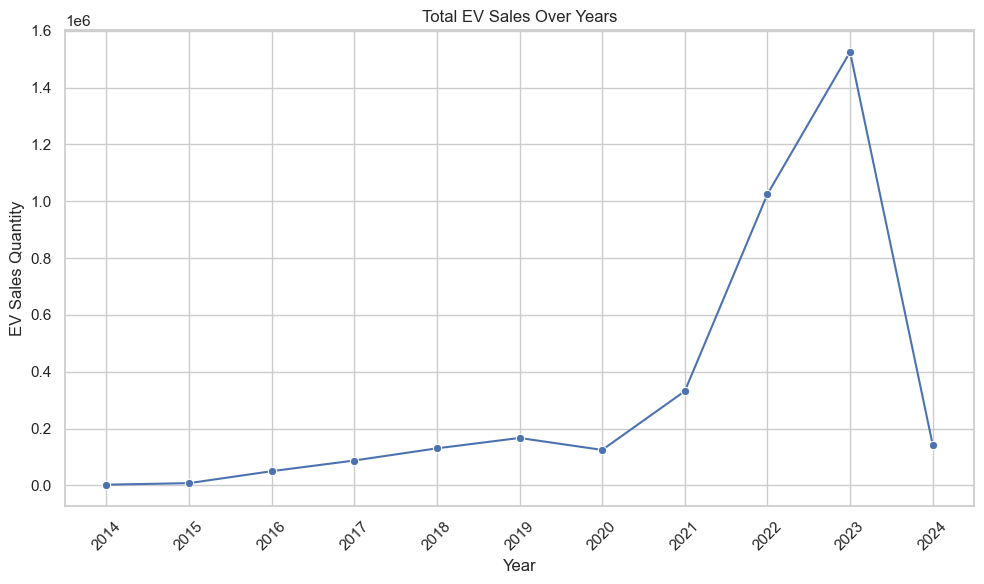

In [39]:
ev_trend = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=ev_trend, x='Year', y='EV_Sales_Quantity', marker='o')
plt.title('Total EV Sales Over Years')
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.xticks(ev_trend['Year'].astype(int), rotation=45)
plt.tight_layout()
plt.show()

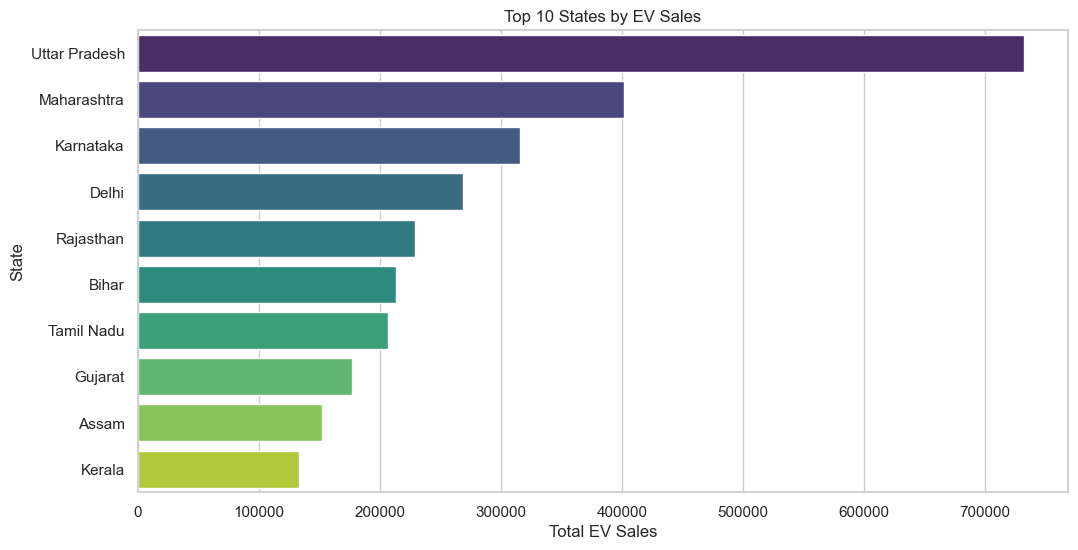

In [40]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')
plt.title('Top 10 States by EV Sales')
plt.xlabel('Total EV Sales')
plt.ylabel('State')
plt.show()

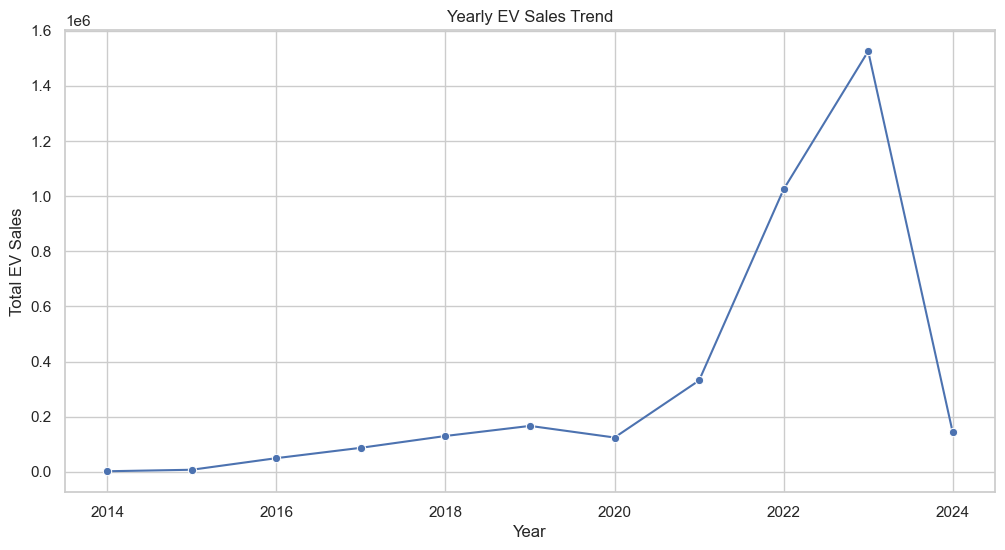

In [41]:
yearly_sales = df.groupby('Year')['EV_Sales_Quantity'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o')
plt.title('Yearly EV Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.grid(True)
plt.show()

In [42]:
print(df.columns)


Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')


In [43]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


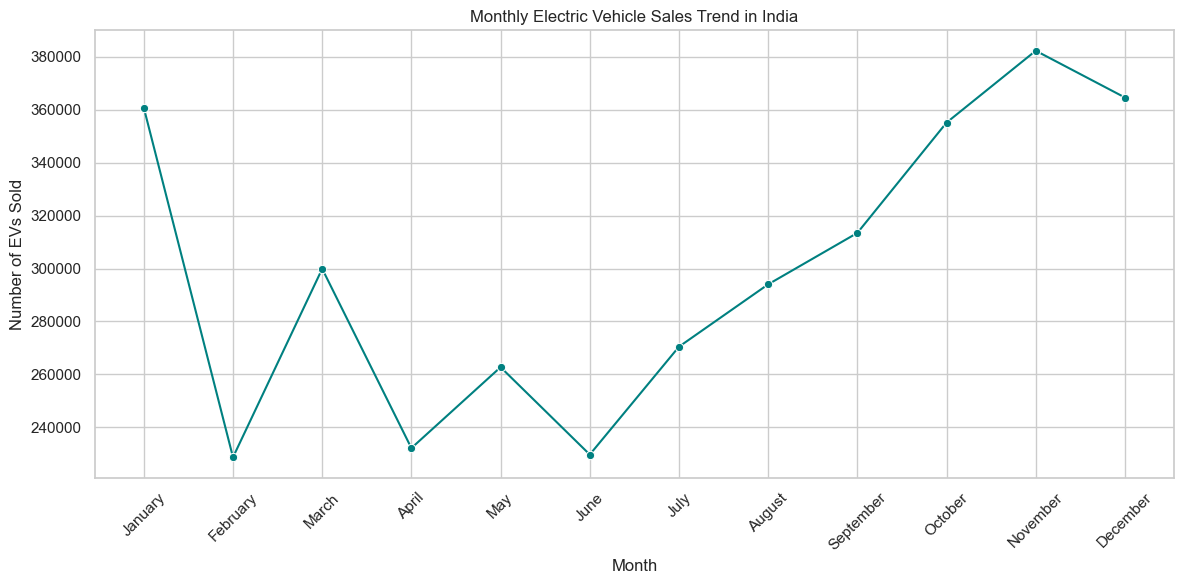

In [44]:
df['Month'] = df['Date'].dt.month_name()
monthly_sales = df.groupby('Month')['EV_Sales_Quantity'].sum()

from pandas.api.types import CategoricalDtype
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
monthly_sales = df.groupby('Month')['EV_Sales_Quantity'].sum().reindex(month_order)
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='teal')
plt.title("Monthly Electric Vehicle Sales Trend in India")
plt.xlabel("Month")
plt.ylabel("Number of EVs Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

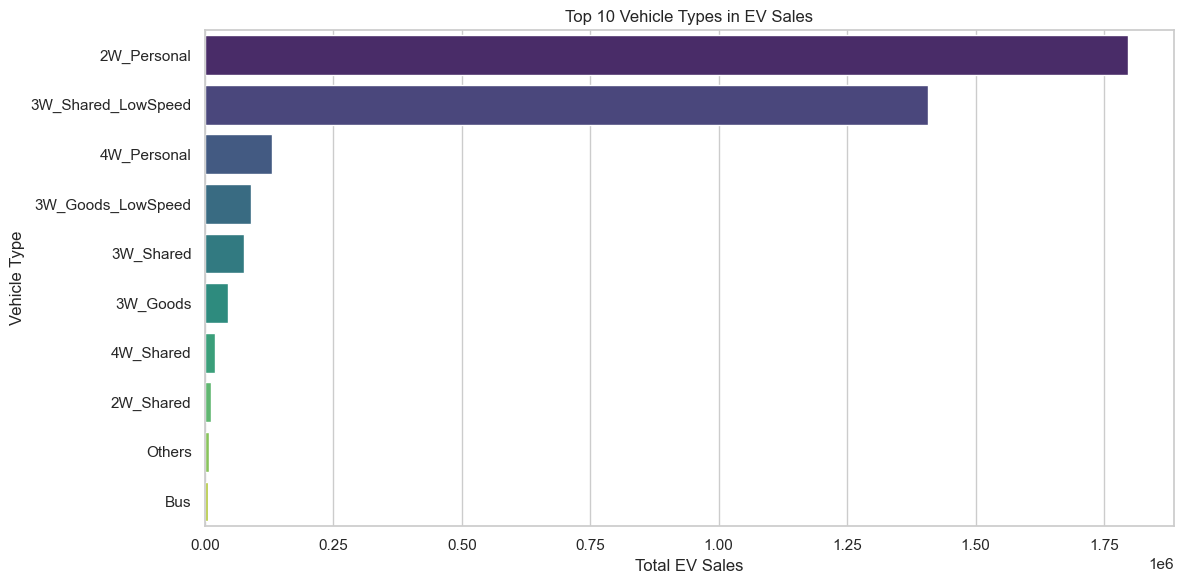

In [45]:
#  which companies are contributing most
top_types = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_types.values, y=top_types.index, palette='viridis')
plt.title("Top 10 Vehicle Types in EV Sales")
plt.xlabel("Total EV Sales")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

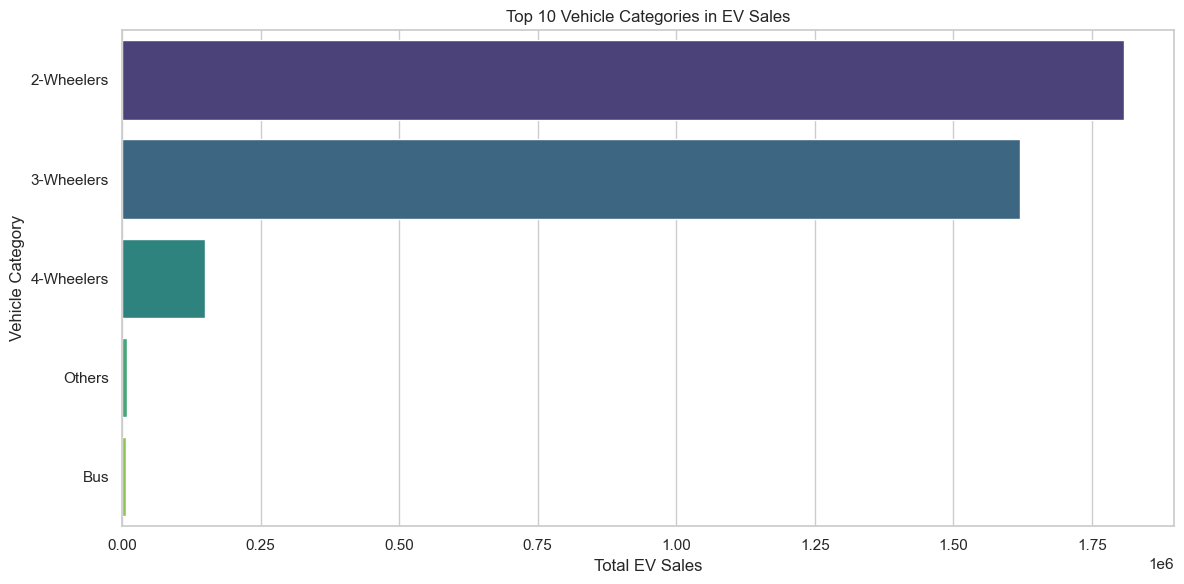

In [46]:
top_categories = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title("Top 10 Vehicle Categories in EV Sales")
plt.xlabel("Total EV Sales")
plt.ylabel("Vehicle Category")
plt.tight_layout()
plt.show()

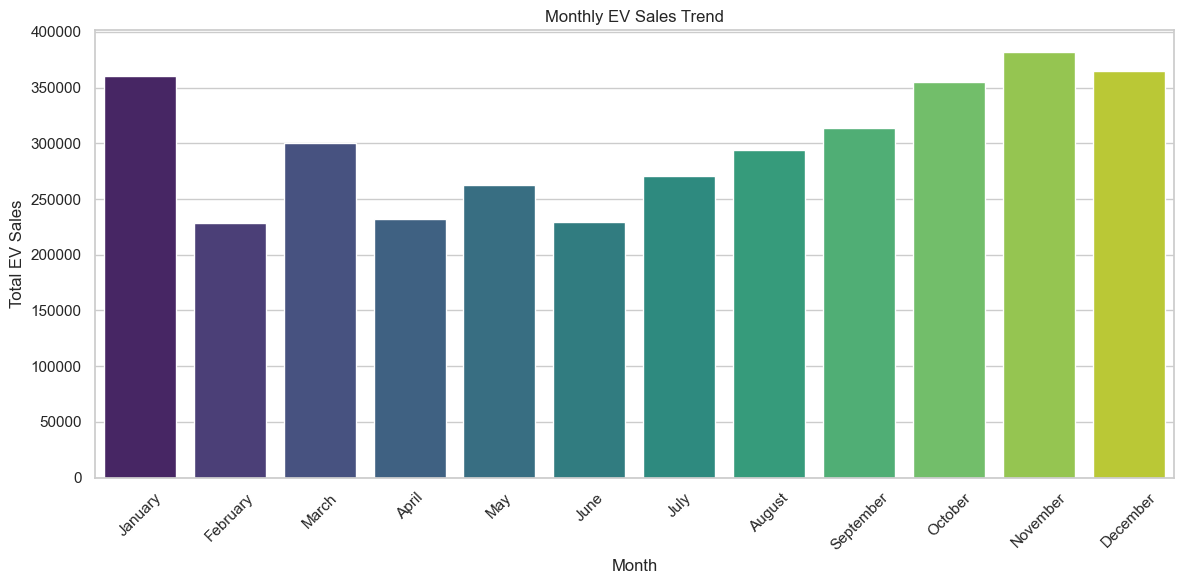

In [47]:
df['Date'] = pd.to_datetime(df['Date']) #'Date' column is datetime
df['Month'] = df['Date'].dt.month_name()
from pandas.api.types import CategoricalDtype
month_order = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)
df['Month'] = df['Month'].astype(month_order)
monthly_sales = df.groupby('Month')['EV_Sales_Quantity'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Monthly EV Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


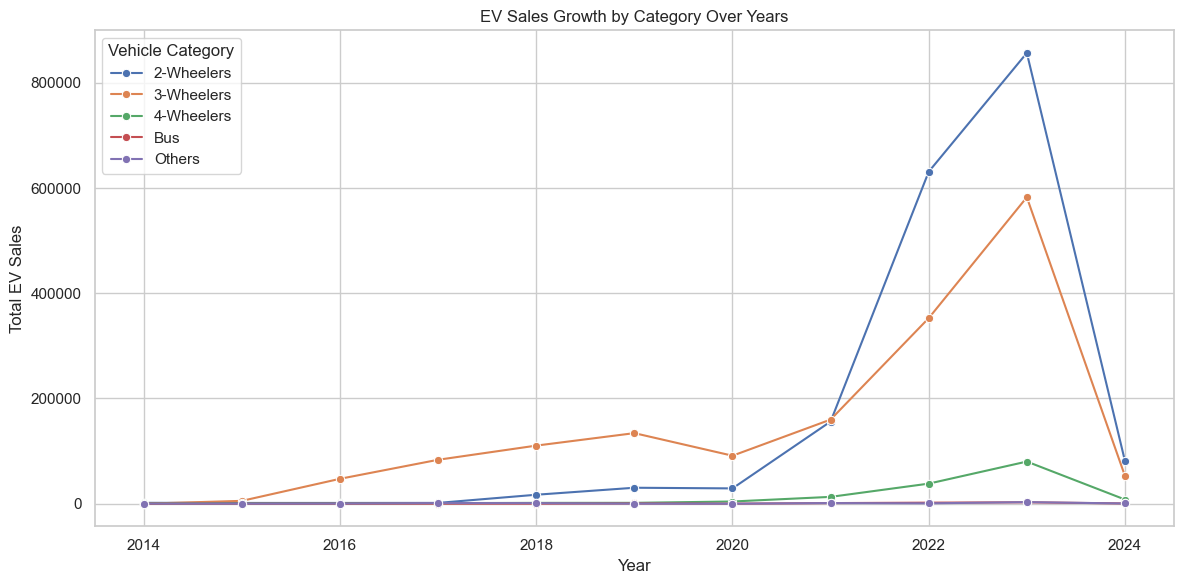

In [48]:
category_trend = df.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=category_trend, x='Year', y='EV_Sales_Quantity', hue='Vehicle_Category', marker='o')
plt.title('EV Sales Growth by Category Over Years')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.grid(True)
plt.legend(title='Vehicle Category')
plt.tight_layout()
plt.show()


In [49]:
## 📊 Final Summary: Electric Vehicle Sales Analysis in India

In this project, I analyzed Electric Vehicle (EV) sales data across Indian states to uncover trends and insights from 2014 to 2024.

---

### ✅ What I Did:
- Cleaned and explored a real-world dataset containing 96,000+ entries.
- Performed visual analysis on:
  - State-wise and year-wise EV sales
  - Most sold vehicle types and categories
  - Monthly and category-wise sales trends
- Created clean and meaningful visualizations using `seaborn` & `matplotlib`.

---

### 📈 Key Insights:
- **Uttar Pradesh** & **Maharashtra** lead in total EV sales.
- **2-Wheelers** & **3-Wheelers** dominate the EV market.
- **Sales peak during festive season months (Oct–Dec)**.
- EV adoption has **rapidly grown** post-2021.

---

### 🔧 Tech Stack:
- Python, pandas, matplotlib, seaborn, Jupyter Notebook

---

### 💡 Final Thoughts:
This project helped me:
- Strengthen my EDA and visualization skills
- Understand EV market trends in India
- Practice beginner-friendly data storytelling

SyntaxError: invalid character '–' (U+2013) (760383689.py, line 20)